In [12]:
%load_ext autoreload
%autoreload 2

In [7]:
# Runs multiple output commands in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [13]:
# This checks the pip jupyter is using
import sys 
print(sys.executable)

/Users/shobhit/.pyenv/versions/TimeSeriesKaggle/bin/python3


In [4]:
import seaborn as sns
from matplotlib import pyplot 
import datetime 

In [5]:
%run -i 'DataLoader.py'

In [11]:
categories

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [17]:
# Checking if all the category names are unique
categories['item_category_name'].nunique()
categories['item_category_id'].nunique()

84

84

In [18]:
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


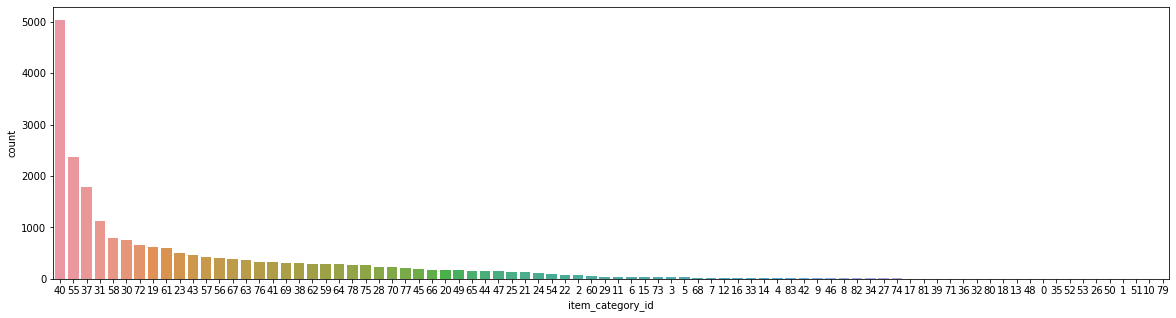

In [21]:
# Checking if all the item names are unique and item category id is between 0 and 83.
items['item_name'].nunique()
items['item_id'].nunique()
all(items['item_category_id']>=0) and all(items['item_category_id']<=83)

fig, ax = pyplot.subplots(figsize=(20,5));
sns.countplot(x='item_category_id',data=items,ax=ax,order=items['item_category_id'].value_counts().index);
#items['item_category_id'].value_counts().tolist()

In [10]:
shops.head()
shops['shop_name'].nunique()
#shops.loc[[57]]

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


60

,shop_name,shop_id
57,"Якутск Орджоникидзе, 56",57


In [23]:
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


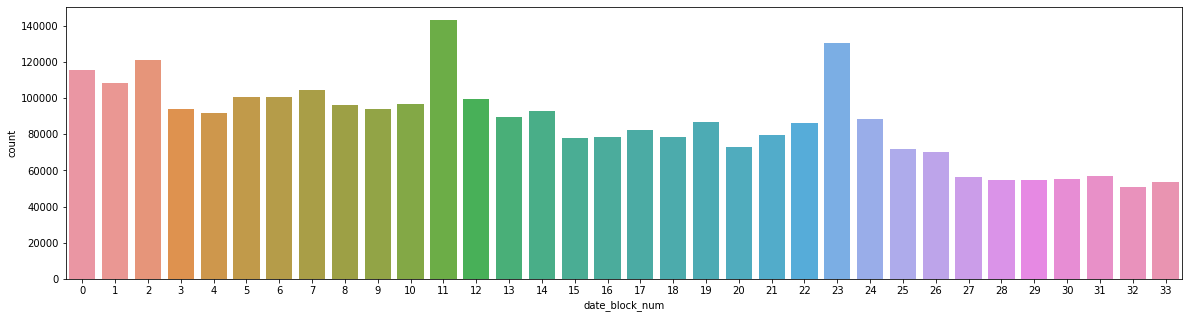

In [160]:
fig, ax = pyplot.subplots(figsize=(20,5));
sns.countplot(x='date_block_num',data=train,ax=ax);

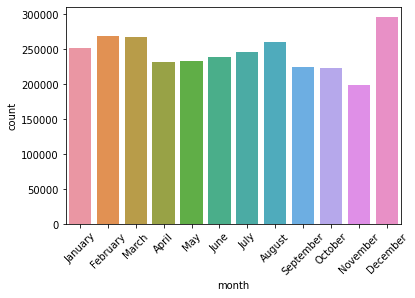

In [172]:
#Convert date to datetime
#train['date']=pd.to_datetime(train['date'],format="%Y-%m-%d")
#train.dtypes

#Combine to months
train['month']=train['date'].dt.strftime("%B");
monthnames=[datetime.date(2020,i,1).strftime("%B") for i in range(1,13)];
sns.countplot(x='month',data=train,order=monthnames);
pyplot.xticks(rotation=45);

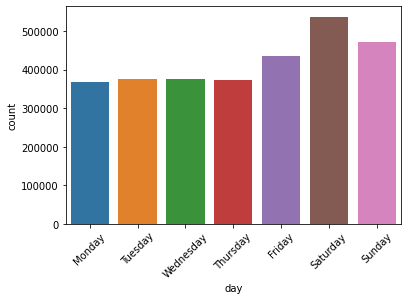

In [173]:
#Combine to days of the week
train['day']=train['date'].dt.strftime("%A");
daynames=[datetime.date(2020,12,i).strftime("%A") for i in range(14,21)];
sns.countplot(x='day',data=train,order=daynames);
pyplot.xticks(rotation=45);

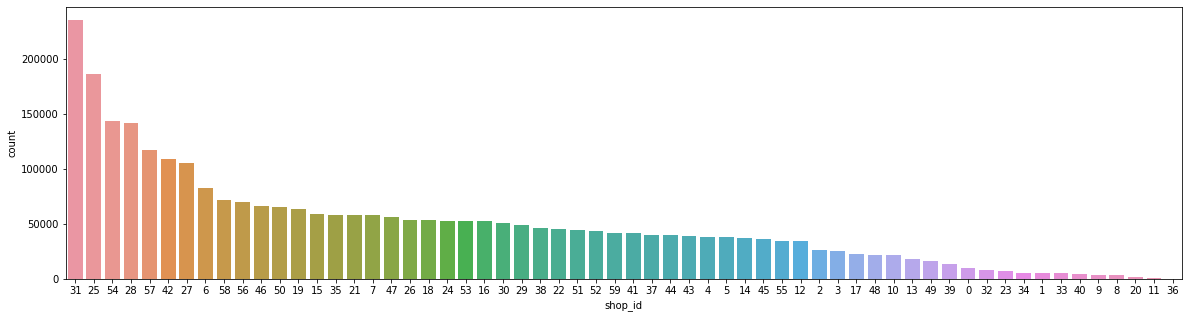

In [174]:
fig, ax = pyplot.subplots(figsize=(20,5));
sns.countplot(x='shop_id',data=train,ax=ax,order=train['shop_id'].value_counts().index);

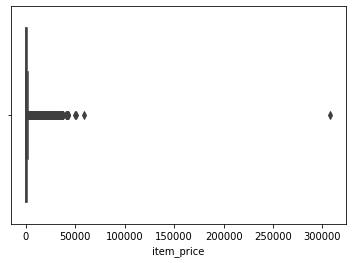

In [201]:
len(train[train['item_cnt_day']<0])
# Assuming negative means refunds

sns.boxplot(x='item_price',data=train);

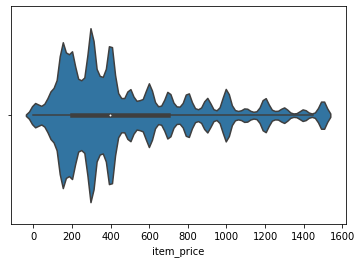

In [199]:
sns.violinplot(x='item_price',data=train[train['item_price']<1500]);

In [190]:
#Use item_id to get item_category_id
train=pd.merge(train, items, how='inner', on=['item_id', 'item_id']);

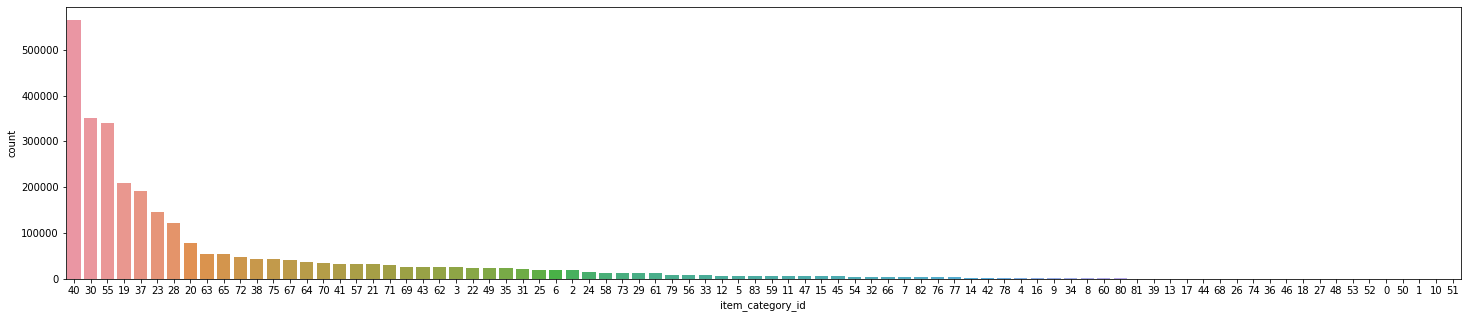

In [241]:
fig, ax = pyplot.subplots(figsize=(25,5));
sns.countplot(x='item_category_id',data=train,ax=ax,order=train['item_category_id'].value_counts().index);

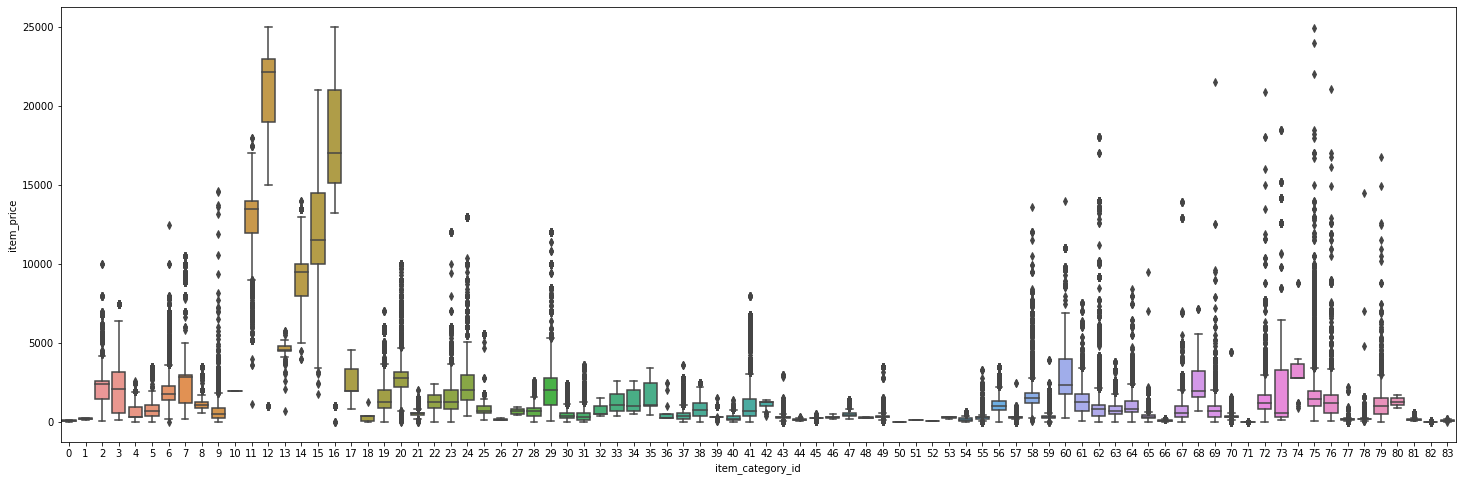

In [210]:
fig, ax = pyplot.subplots(figsize=(25,8));
sns.boxplot(x='item_category_id',y='item_price',data=train[train['item_price']<25000],ax=ax);

In [ ]:
# NOW STARTING TO SEE THE VARIATION OF PRODUCT QUANTITY WITH DIFFERENT FEATURES

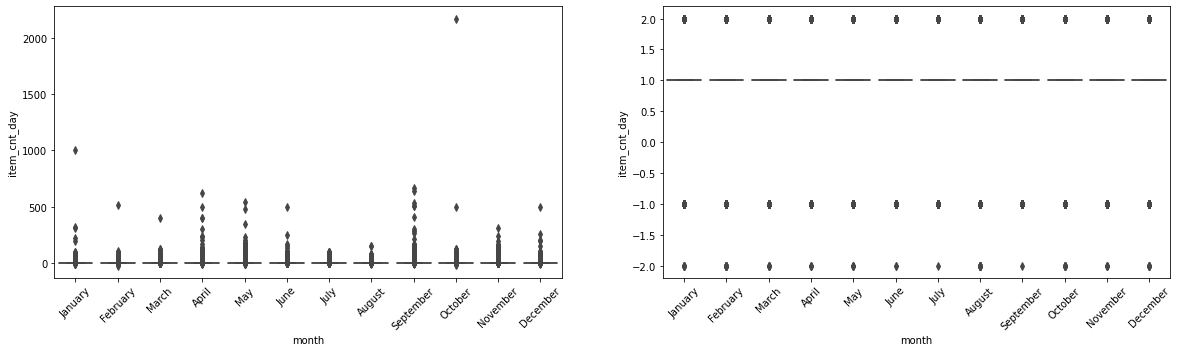

In [234]:
fig, ax = pyplot.subplots(1,2,figsize=(20,5));
sns.boxplot(ax=ax[0],x='month',y='item_cnt_day',data=train[train['item_price']<25000],order=monthnames);
pyplot.sca(ax[0]);
pyplot.xticks(rotation=45);
sns.boxplot(ax=ax[1],x='month',y='item_cnt_day',data=train[train['item_cnt_day'].between(-2,2)],order=monthnames);
pyplot.sca(ax[1]);
pyplot.xticks(rotation=45);

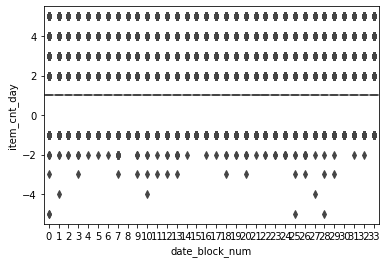

In [249]:
sns.boxplot(x='date_block_num',y='item_cnt_day',data=train[train['item_cnt_day'].between(-5,5)]);

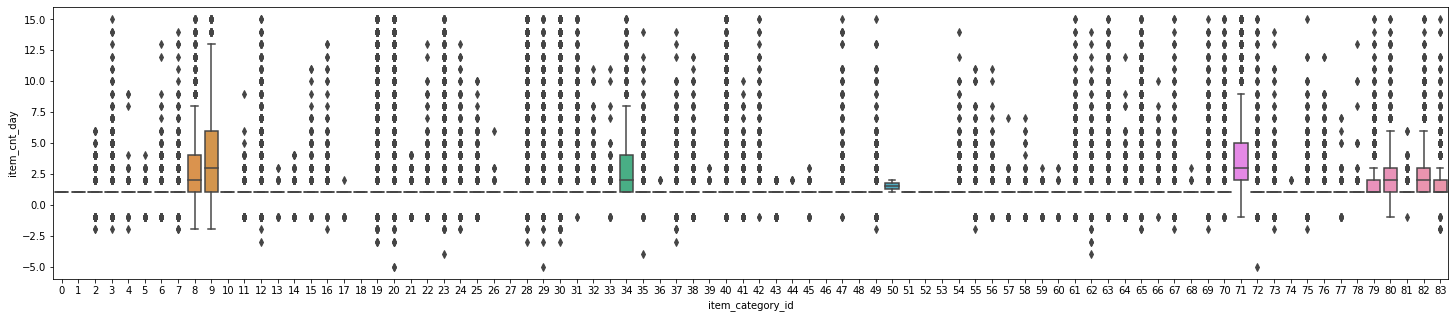

In [237]:
fig, ax = pyplot.subplots(figsize=(25,5));
sns.boxplot(ax=ax,x='item_category_id',y='item_cnt_day',data=train[train['item_cnt_day'].between(-5,15)]);

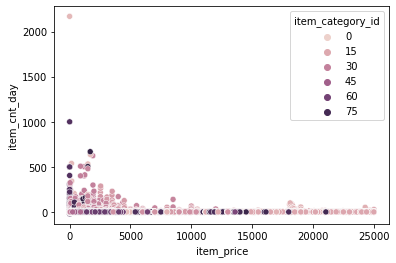

In [245]:
sns.scatterplot(x='item_price',y='item_cnt_day',data=train[train['item_price']<25000],hue='item_category_id');

In [ ]:
#Price trajectories

In [28]:
test

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [254]:
# Checking the number of unique (shop,item) pairs in train data
train.groupby(['item_id','shop_id']).size()

item_id  shop_id
0        54         1
1        55         6
2        54         2
3        54         2
4        54         1
                   ..
22168    12         2
         16         1
         42         1
         43         1
22169    25         1
Length: 424124, dtype: int64

In [29]:
sample_sub

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
214195,214195,0.5
214196,214196,0.5
214197,214197,0.5
214198,214198,0.5
